In [136]:
import numpy as np
import matplotlib.pyplot as plt 
import math

from utils.functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[-0.23218988 -0.78887733  0.67274549 -0.15917105  0.9040216  -0.93789804
  1.36098305]


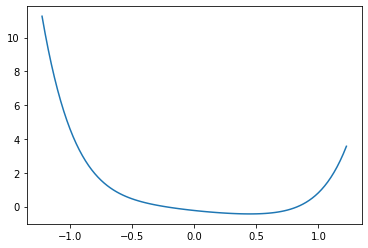

In [21]:
f_deg = 6

mu, sigma = 0, 1 # mean and standard deviation
f = np.random.normal(mu, sigma, f_deg  + 1)

print(f)

def plot_f(f, x_array):
    y_array = np.zeros(len(x_array))
    for deg in range(len(f)):
        y_array += f[deg] * (x_array ** deg)
        
    plt.plot(x_array, y_array)

x_array = (np.array(range(1,100)) - 50)/40
plot_f(f, x_array)

# 1. Berrut Approximation Encoding

Input:  [[ 0.41045256 -0.96484393]
 [-0.59999082 -0.85528461]
 [-0.49575738  0.60117774]
 [ 0.75724553 -0.80351658]
 [-0.85310884 -0.12923393]
 [ 0.41805074 -0.24975487]
 [-0.17319999  0.46606532]
 [-0.31946357 -0.71656732]
 [-0.3587958   0.60288363]
 [-0.91468122 -0.98959772]
 [ 0.74562138 -0.96743973]
 [-0.12000868 -0.00661638]
 [-0.58754083  0.60646971]
 [-0.01688632  0.6705097 ]
 [-0.79869541 -0.6223649 ]
 [ 0.84195436 -0.2923249 ]
 [ 0.6845029  -0.14552671]
 [-0.36314465 -0.93261406]
 [-0.86635541  0.4960902 ]
 [ 0.61315014  0.01933978]] 

j:  [0.07853982 0.23561945 0.39269908 0.54977871 0.70685835 0.86393798
 1.02101761 1.17809725 1.33517688 1.49225651 1.64933614 1.80641578
 1.96349541 2.12057504 2.27765467 2.43473431 2.59181394 2.74889357
 2.9059732  3.06305284] 

alpha_array:  [ 0.99691733  0.97236992  0.92387953  0.85264016  0.76040597  0.64944805
  0.52249856  0.38268343  0.23344536  0.0784591  -0.0784591  -0.23344536
 -0.38268343 -0.52249856 -0.64944805 -0.76040597 -0.852640

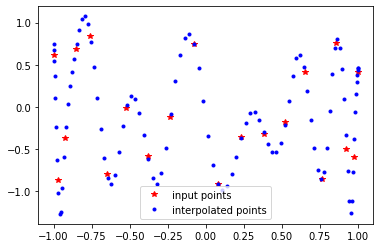

In [130]:
N=101
K= 20
d = 2
m = 20

input_array = np.random.uniform(low=-1.0, high=1.0, size=(m,d))

print("Input: ",input_array,'\n')

j_array = np.array(range(K))
print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')




    
X_tilde = BACC_Enc(input_array, alpha_array, z_array)

print('shape of X_tilde= ',np.shape(X_tilde))

# check Encoding
plt.plot(alpha_array, input_array[:,0],'r*',label='input points')
plt.plot(z_array, X_tilde[:,0,0],'b.',label='interpolated points')
plt.legend()
plt.show()

# 2. Local computation

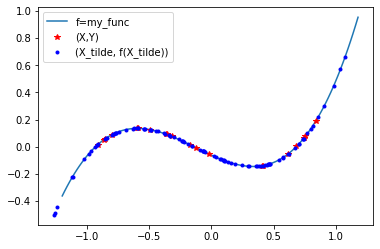

In [145]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_array, Y_array, 'r*', label='(X,Y)')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.legend()
plt.show()

# 3. BACC decoding

(101, 1, 1)
[[[-0.13806079]]

 [[ 0.14646876]]

 [[ 0.12010788]]

 [[ 0.08233943]]

 [[ 0.05764343]]

 [[-0.13779618]]

 [[ 0.01407263]]

 [[ 0.07689593]]

 [[ 0.09005913]]

 [[ 0.01549631]]

 [[ 0.06530255]]

 [[-0.00934799]]

 [[ 0.13543059]]

 [[-0.05552687]]

 [[ 0.09013509]]

 [[ 0.19298737]]

 [[ 0.00356119]]

 [[ 0.09147474]]

 [[ 0.05339181]]

 [[-0.07637414]]]
[-0.1394436   0.13526536  0.12641911  0.07871717  0.05985633 -0.13818718
  0.01489983  0.07626162  0.09039732  0.01540416  0.06522006 -0.00909247
  0.13523012 -0.05475134  0.08981925  0.19236046  0.00212302  0.09187373
  0.05126627 -0.05571007]


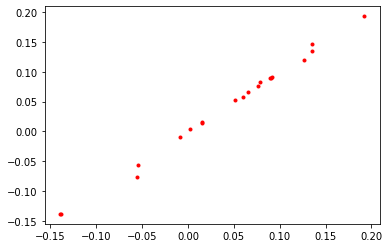

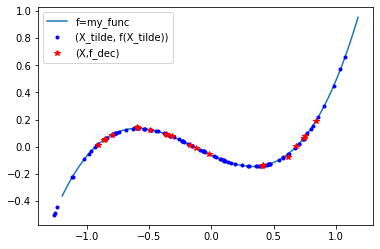

In [148]:
f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))
print(np.shape(f_tilde))

f_dec = BACC_Dec(f_tilde, alpha_array, z_array)
print(f_dec)
print(Y_array)

plt.plot(Y_array, np.reshape(f_dec,K), 'r.')
plt.show()

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.legend()
plt.show()